# DIWALI SALES DATA ANLSIS PROJECT

## Importing the necessary libraries for the project: 

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Data Loading and Inspection:

In [9]:
df = pd.read_csv("Diwali_Sales_Data.csv", encoding='unicode_escape') 
print("Basic Information :")
df.info()
print('-'*50,'\n')

print('Few data values of a Diwali dataset :')
print(df.head())
print('-'*50,'\n')

print("Statistical information of Diwali dataset :")
print(df.describe())
print('-'*50,'\n')

print('Total rows & columns in a dataset :')
print(df.shape)
print('-'*50,'\n')

# Display any missing values in the dataset
print("Missing Values in the Dataset:")
print(df.isnull().sum())

# df.head()

Basic Information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB
----------

## 2. Handling missing data & cleaning it: 

In [ ]:
# Drop unused columns
df.drop(columns=['unnamed1'], inplace=True)

# Convert "Marital_Status" to categorical if needed
df['Marital_Status'] = df['Marital_Status'].astype('category')

# Handle missing values in "Amount" column (e.g., replace with mean)
mean_amount = df['Amount'].mean()
df['Amount'].fillna(mean_amount, inplace=True)

# Verify changes
print(df.info())

# Check for duplicates
duplicates = df.duplicated()  # Find duplicate rows
df[duplicates]  # Display duplicate rows if any

# # Remove duplicates
df.drop_duplicates(inplace=True)  # Remove duplicate rows

# # Reset index
df.reset_index(drop=True, inplace=True)  # Reset index after removing duplicates

# # Save cleaned data to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)

## 3. Following Analysis on Dataset

### 1. General Overview :

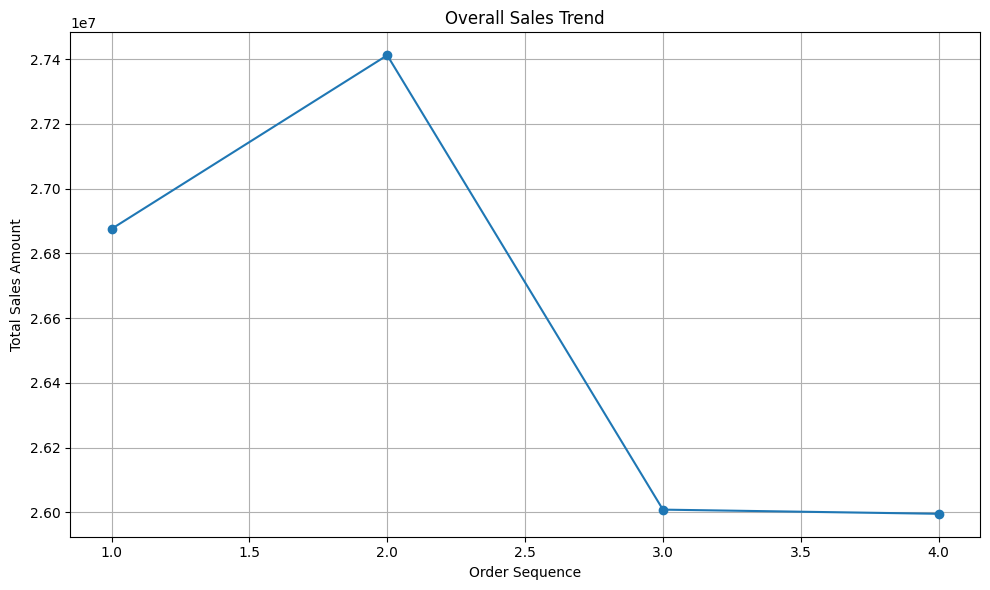

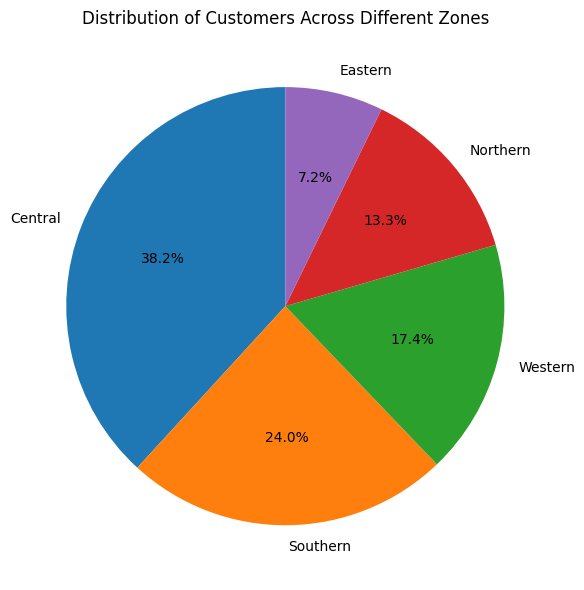

In [19]:
df1 = pd.read_csv('cleaned_dataset.csv')

# The overall sales trend during the Diwali period

# Assuming 'Orders' column represents the order sequence
# Aggregate sales by order sequence
overall_sales_trend = df1.groupby('Orders')['Amount'].sum()

# Visualize the overall sales trend
plt.figure(figsize=(10, 6))
overall_sales_trend.plot(kind='line', grid = True, marker='o', linestyle='-')
plt.title('Overall Sales Trend')
plt.xlabel('Order Sequence')
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()

# Distribution of customers across different zones
zone_distribution = df1['Zone'].value_counts()

plt.figure(figsize=(8, 6))
zone_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customers Across Different Zones')
plt.ylabel('')
plt.tight_layout()
plt.show()


### 2. Customer Demographics:

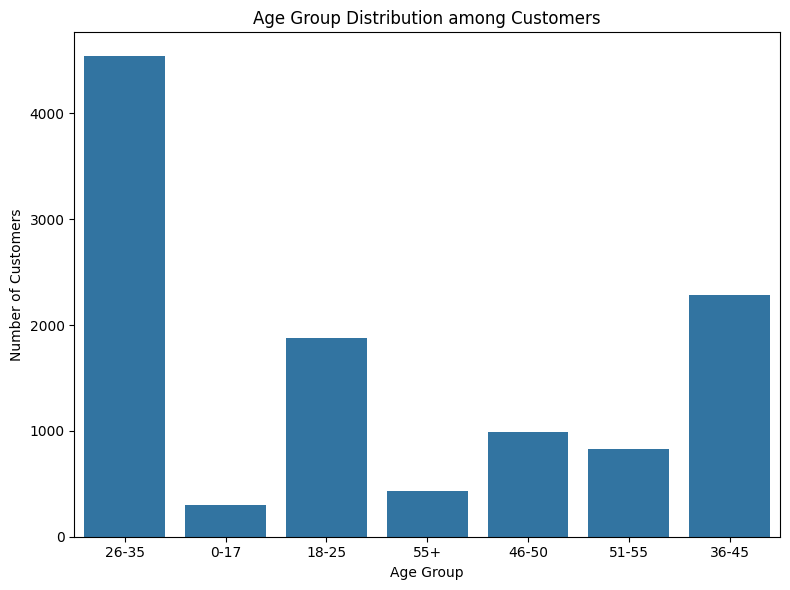

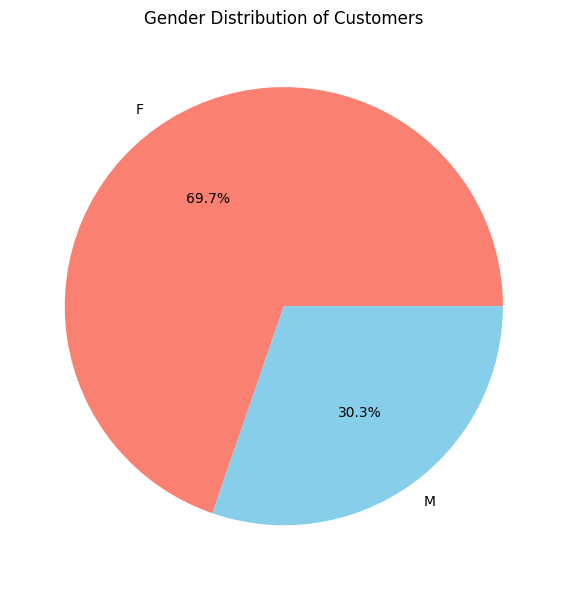

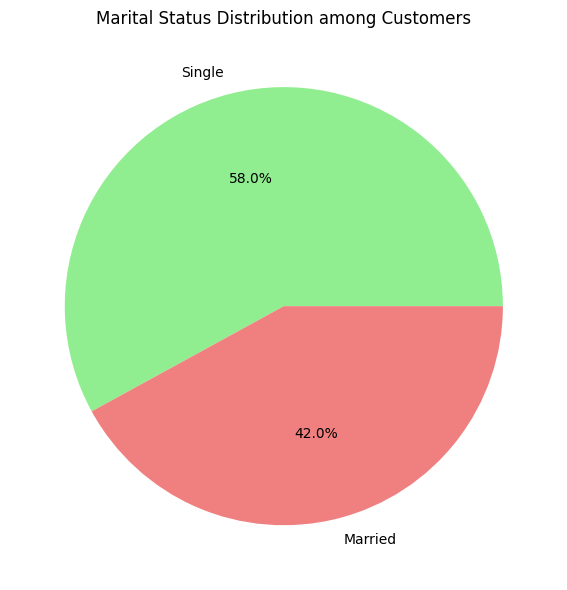

In [24]:
# How is the age group distributed among customers?
age_group_distribution = df1['Age Group'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='Age Group')
plt.title('Age Group Distribution among Customers')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# What is the gender distribution of customers?
plt.figure(figsize=(6, 6))
df1['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['salmon', 'skyblue'])
plt.title('Gender Distribution of Customers')
plt.ylabel('')
plt.tight_layout()
plt.show()

# How many customers are married or single?
plt.figure(figsize=(6, 6))
df1['Marital_Status'].replace({1: 'Married', 0: 'Single'}).value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Marital Status Distribution among Customers')
plt.ylabel('')
plt.tight_layout()
plt.show()



### 3. Product Analysis:

In [37]:
# Which products are the most popular during Diwali?
most_popular_products = df1.groupby('Product_ID')['Amount'].sum().sort_values(ascending=False).head(10)
print("Top 10 Most Popular Products During Diwali:")
print(most_popular_products)
print('-'*50,'\n')

# What is the average amount spent on different product categories?
average_amount_by_category = df1.groupby('Product_Category')['Amount'].mean()
print("\nAverage Amount Spent on Different Product Categories:")
print(average_amount_by_category)
print('-'*50,'\n')

# Are there any specific products that attract a particular gender or age group?
gender_product_preferences = df1.groupby(['Gender', 'Product_ID']).size().unstack(fill_value=0)
print("\nGender Preferences for Specific Products:")
print(gender_product_preferences)

age_group_product_preferences = df1.groupby(['Age Group', 'Product_ID']).size().unstack(fill_value=0)
print("\nAge Group Preferences for Specific Products:")
print(age_group_product_preferences)


Top 10 Most Popular Products During Diwali:
Product_ID
P00265242    540136.0
P00110942    424833.0
P00184942    401816.0
P00112142    341020.0
P00059442    338571.0
P00237542    322363.0
P00058042    307040.0
P00110742    294548.0
P00110842    290661.0
P00080342    283309.0
Name: Amount, dtype: float64
-------------------------------------------------- 


Average Amount Spent on Different Product Categories:
Product_Category
Auto                     19832.351743
Beauty                    4643.327014
Books                    10305.611650
Clothing & Apparel        6213.521297
Decor                     7607.916667
Electronics & Gadgets     7496.473103
Food                     13623.042251
Footwear & Shoes         14682.779609
Furniture                15437.692920
Games & Toys             11222.005181
Hand & Power Tools       15600.692308
Household items           3017.955769
Office                     725.097345
Pet Care                  2274.891509
Sports Products          10213.294944
S

### 4. State and Zone Analysis:

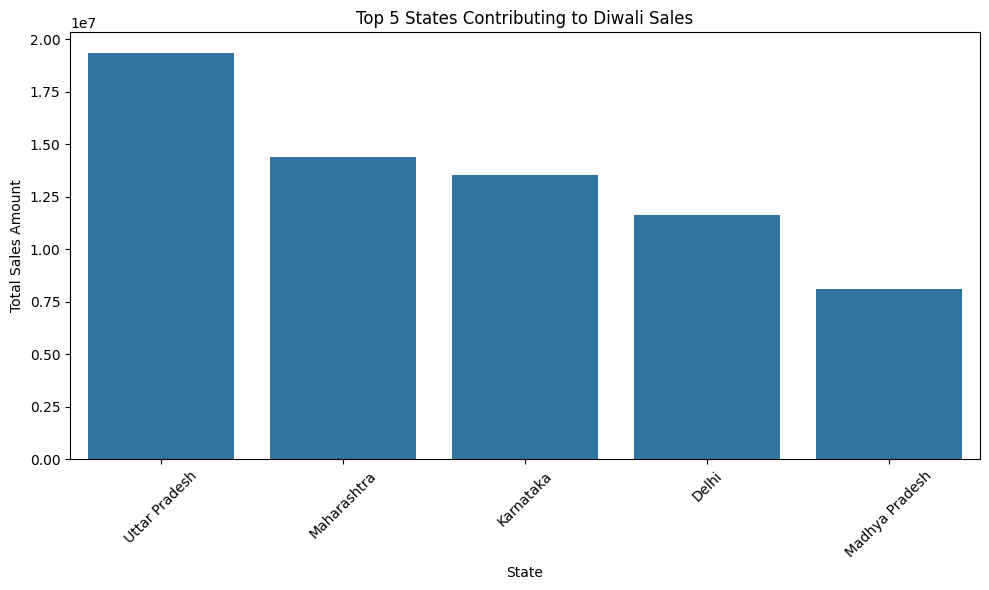

------------------------------------------------------------------------------------------------------------------------------------------------ 



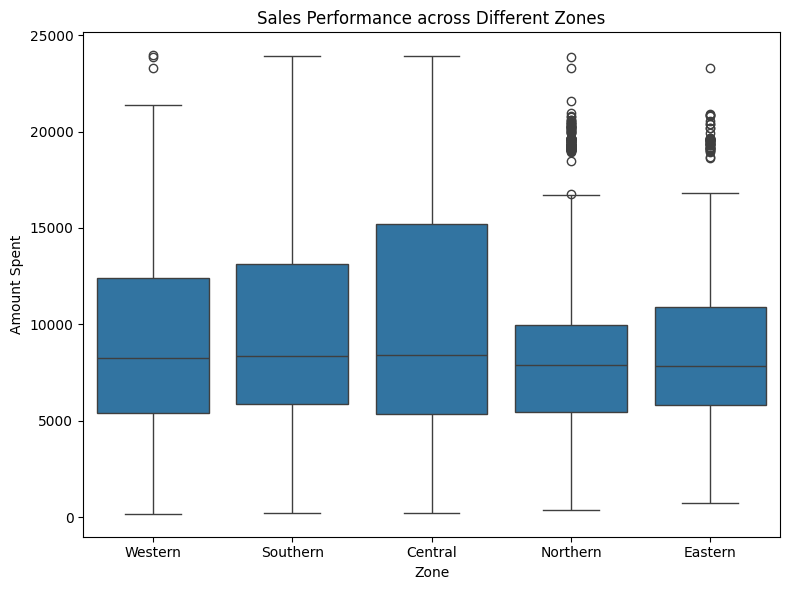

------------------------------------------------------------------------------------------------------------------------------------------------ 



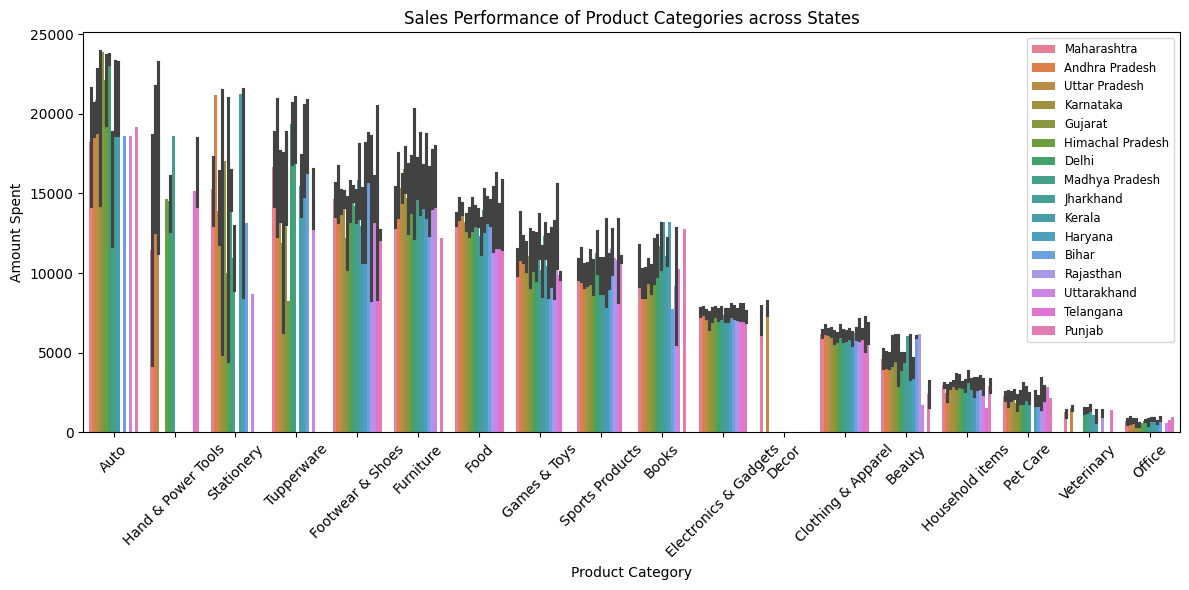

In [83]:
# Which states contribute the most to Diwali sales?
top_states = df1.groupby('State')['Amount'].sum().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 5 States Contributing to Diwali Sales')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('-'*144,'\n')

# How does sales performance vary across different zones?
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Zone', y='Amount')
plt.title('Sales Performance across Different Zones')
plt.xlabel('Zone')
plt.ylabel('Amount Spent')
plt.tight_layout()
plt.show()

print('-'*144,'\n')

# Are there specific products or product categories that perform better in certain states or zones?
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='Product_Category', y='Amount', hue='State')
plt.title('Sales Performance of Product Categories across States')
plt.xlabel('Product Category')
plt.legend(fontsize = 'small')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### 5. Occupation Analysis:

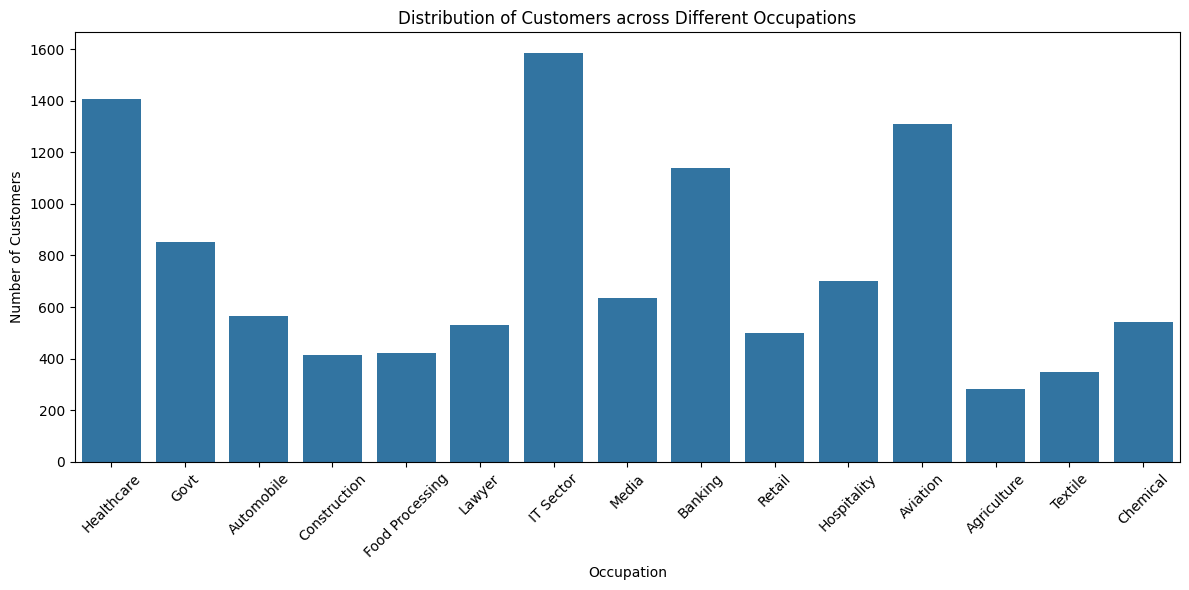

------------------------------------------------------------------------------------------------------------------------------------------------ 

Product Preferences by Occupation:
Product_Category  Auto  Beauty  Books  Clothing & Apparel  Decor  \
Occupation                                                         
Agriculture          1      10      3                  70      2   
Automobile           8      19      1                 136      3   
Aviation            12      39     22                 281      8   
Banking             12      36     11                 274     16   
Chemical             0      13      7                 116      4   
Construction         4      14      3                 108      7   
Food Processing      7      10      3                  97      5   
Govt                12      41      7                 188      3   
Healthcare           5      59      9                 361     12   
Hospitality          8      21      2                 187      7   
IT

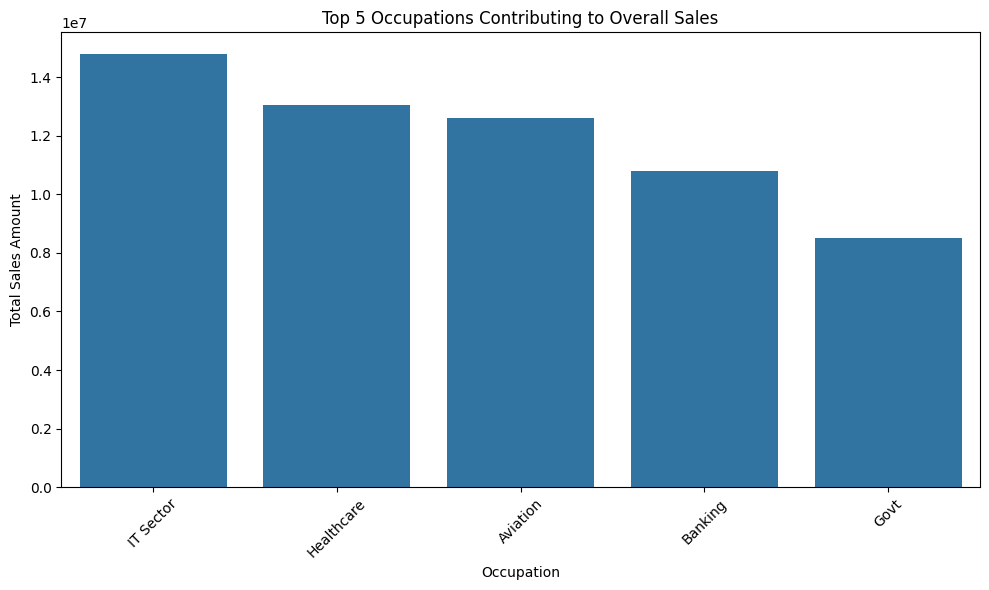

In [116]:
# What is the distribution of customers across different occupations?
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='Occupation')
plt.title('Distribution of Customers across Different Occupations')
plt.xlabel('Occupation')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('-'*144, '\n')

# Do certain occupations show a higher propensity for purchasing specific products?
occupation_product_preferences = df1.groupby(['Occupation', 'Product_Category']).size().unstack(fill_value=0)
print("Product Preferences by Occupation:")
print(occupation_product_preferences)
print('-'*100, '\n')

# Are there occupations that contribute significantly to overall sales?
top_occupations = df1.groupby('Occupation')['Amount'].sum().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_occupations.index, y=top_occupations.values)
plt.title('Top 5 Occupations Contributing to Overall Sales')
plt.xlabel('Occupation')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### 6. Orders and Amount Analysis:

In [125]:
# What is the average number of orders placed by customers?
average_orders_per_customer = round(df1['Orders'].mean(), 3)
print("Average Number of Orders Placed by Customers:", average_orders_per_customer)
print()

# What is the average amount spent by customers during Diwali?
average_amount_spent = round(df1['Amount'].mean(), 3)
print("Average Amount Spent by Customers During Diwali:", average_amount_spent)
print()

# Is there any correlation between the number of orders and the total amount spent?
correlation = round(df['Orders'].corr(df1['Amount']), 5)
print("Correlation between Number of Orders and Total Amount Spent:", correlation)


Average Number of Orders Placed by Customers: 2.489

Average Amount Spent by Customers During Diwali: 9454.084

Correlation between Number of Orders and Total Amount Spent: -0.01261


### 7. Status Analysis:

### 8. Gender and Age Group Analysis:

Average Number of Orders by Gender:
Gender
F    2.494769
M    2.474890
Name: Orders, dtype: float64

Average Amount Spent by Gender:
Gender
F    9492.500451
M    9365.654397
Name: Amount, dtype: float64


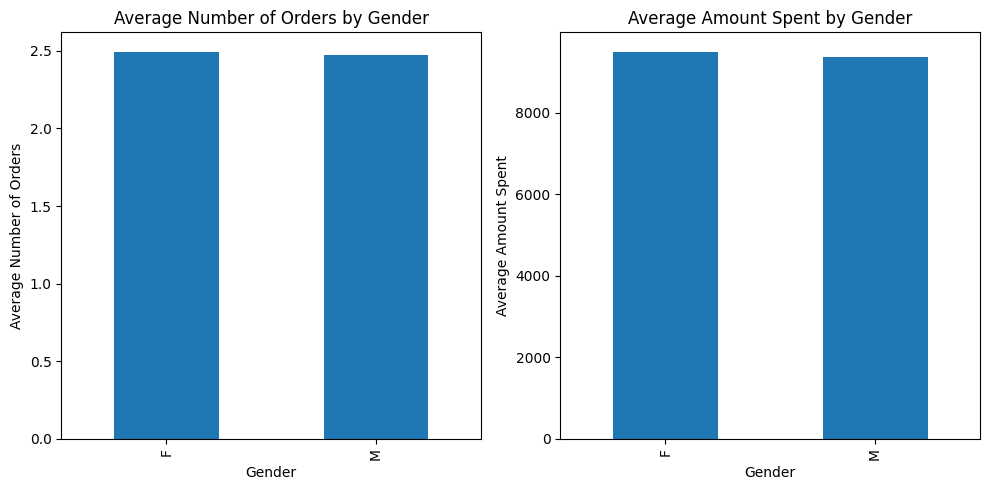

------------------------------------------------------------------------------------------------------------------------------------------------ 


Total Sales Amount by Age Group:
Age Group
0-17     2.699653e+06
18-25    1.723553e+07
26-35    4.260068e+07
36-45    2.216350e+07
46-50    9.245658e+06
51-55    8.256816e+06
55+      4.090441e+06
Name: Amount, dtype: float64


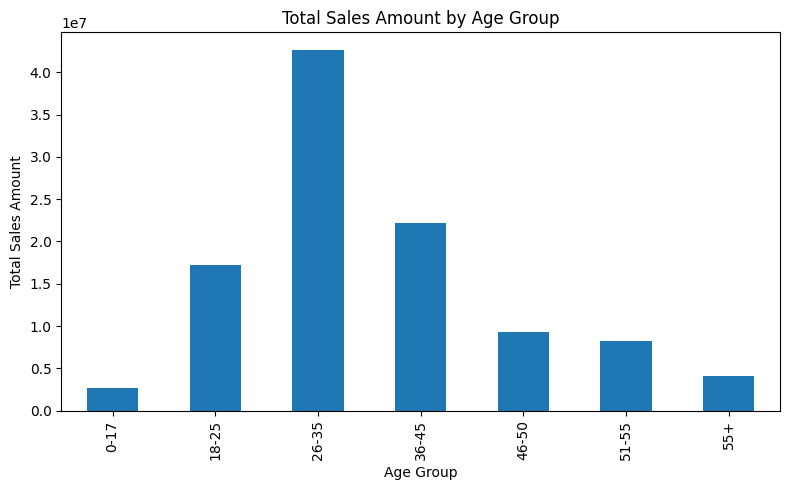

------------------------------------------------------------------------------------------------------------------------------------------------ 


Sales of Product Categories by Gender and Age Group:
Product_Category  Gender  Age Group
Auto              F       0-17           9732.000000
                          18-25        288925.000000
                          26-35        541529.990000
                          36-45        263399.000000
                          46-50         70585.610858
                                           ...      
Veterinary        M       18-25          5586.000000
                          26-35          6345.000000
                          36-45          6671.000000
                          46-50           732.000000
                          51-55          3132.000000
Name: Amount, Length: 232, dtype: float64


In [205]:
# Purchasing Behavior Differences between Gender Groups
gender_order_mean = df1.groupby('Gender')['Orders'].mean()
gender_amount_mean = df1.groupby('Gender')['Amount'].mean()

print("Average Number of Orders by Gender:")
print(gender_order_mean)
print("\nAverage Amount Spent by Gender:")
print(gender_amount_mean)

# Visualize the comparisons
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
gender_order_mean.plot(kind='bar')
plt.title('Average Number of Orders by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of Orders')

plt.subplot(1, 2, 2)
gender_amount_mean.plot(kind='bar')
plt.title('Average Amount Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Amount Spent')
plt.tight_layout()
plt.show()

print('-'*144,'\n')

# Contribution of Age Groups to Sales
age_group_sales = df1.groupby('Age Group')['Amount'].sum()
print("\nTotal Sales Amount by Age Group:")
print(age_group_sales)

# Visualize the contribution of each age group to sales
plt.figure(figsize=(8, 5))
age_group_sales.plot(kind='bar')
plt.title('Total Sales Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()
print('-'*144,'\n')

# Product Appeal Analysis by Gender and Age Group
product_sales_gender_age = df1.groupby(['Product_Category', 'Gender', 'Age Group'])['Amount'].sum()
print("\nSales of Product Categories by Gender and Age Group:")
print(product_sales_gender_age)


### 9. Marital Status Analysis:

Purchasing Behavior by Marital Status:
                  Orders       Amount
Marital_Status                       
0               2.492022  9533.070096
1               2.484233  9345.126112


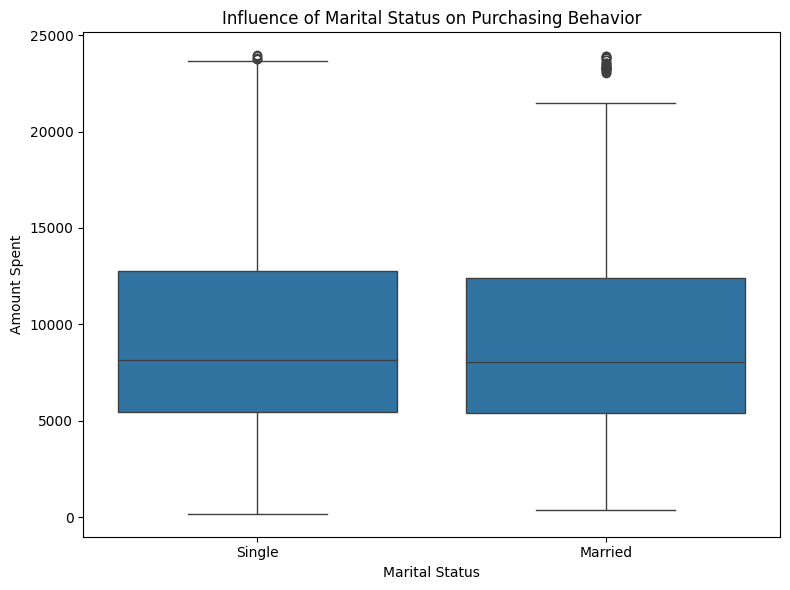

------------------------------------------------------------------------------------------------------------------------------------------------ 


Product Preferences by Marital Status:
Product_Category          Auto     Beauty     Books  Clothing & Apparel  \
Marital_Status                                                            
0                 1.077539e+06  1132849.0  505163.0           9520315.0   
1                 8.858642e+05   826635.0  556315.0           6964157.0   

Product_Category     Decor  Electronics & Gadgets          Food  \
Marital_Status                                                    
0                 376510.0              8826810.0  2.043175e+07   
1                 353850.0              6780847.0  1.353049e+07   

Product_Category  Footwear & Shoes     Furniture  Games & Toys  \
Marital_Status                                                   
0                     9.012569e+06  3.164551e+06     2568592.0   
1                     6.609909e+06  2.284955e

<Figure size 1200x600 with 0 Axes>

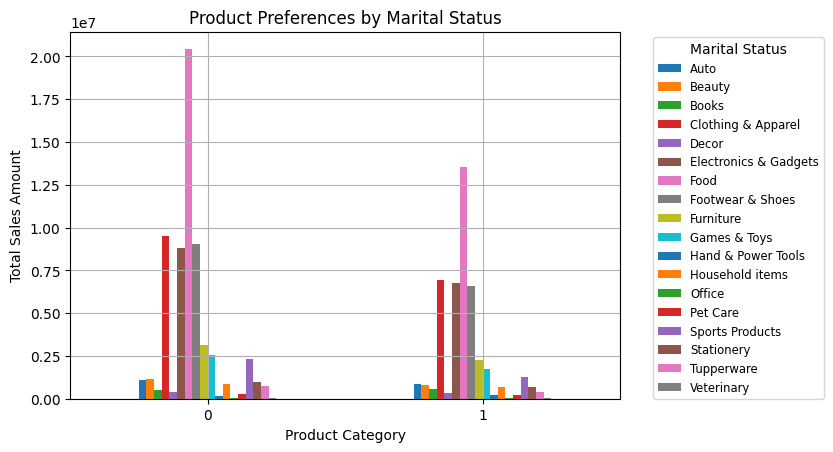

In [223]:
# Explore Purchasing Behavior by Marital Status
marital_status_purchasing_behavior = df1.groupby('Marital_Status').agg({'Orders': 'mean', 'Amount': 'mean'})
print("Purchasing Behavior by Marital Status:")
print(marital_status_purchasing_behavior)

plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='Marital_Status', y='Amount')
plt.title('Influence of Marital Status on Purchasing Behavior')
plt.xlabel('Marital Status')
plt.ylabel('Amount Spent')
plt.xticks([0, 1], ['Single', 'Married'])
plt.tight_layout()
plt.show()

print('-'*144,'\n')

# Analyze Product Preferences by Marital Status
product_preferences_marital = df1.groupby(['Marital_Status', 'Product_Category'])['Amount'].sum().unstack(fill_value=0)
print("\nProduct Preferences by Marital Status:")
print(product_preferences_marital)

# Visualize Product Preferences by Marital Status
plt.figure(figsize=(12, 6))
product_preferences_marital.plot(kind='bar')
plt.title('Product Preferences by Marital Status')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 'small')
plt.show()

### 10. Correlation and Relationships:

In [192]:
# # Investigate correlations between different columns
# correlation_matrix = df1['Age'].corr(df1['Amount'])
# print("Correlation Matrix:")
# print(correlation_matrix)

# Investigate correlation between age and amount spent
correlation_age_amount = df1['Age'].corr(df1['Amount'])
print("\nCorrelation between Age and Amount Spent:", correlation_age_amount)

# Investigate correlation between orders and product categories
# Assuming 'Orders' is related to the number of orders and 'Product_Category' is categorical
# We can calculate point-biserial correlation between 'Orders' and 'Product_Category' using dummy encoding
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pointbiserialr

# Encode 'Product_Category' using LabelEncoder
label_encoder = LabelEncoder()
df1['Product_Category_Encoded'] = label_encoder.fit_transform(df1['Product_Category'])

# Calculate point-biserial correlation
correlation_orders_product_category = pointbiserialr(df1['Orders'], df1['Product_Category_Encoded'])
print("Point-biserial Correlation between Orders and Product Category:", correlation_orders_product_category)



Correlation between Age and Amount Spent: 0.030421282651078626
Point-biserial Correlation between Orders and Product Category: SignificanceResult(statistic=-0.006177942321066726, pvalue=0.5124682313073728)


### 11. Recommendations

In [228]:
# Example of providing recommendations
print("Based on the analysis conducted:")
print("- Implement targeted marketing campaigns to reach different customer segments.")
print("- Promote top-selling products during Diwali to capitalize on customer preferences.")
print("- Offer personalized promotions and discounts based on customer demographics.")

Based on the analysis conducted:
- Implement targeted marketing campaigns to reach different customer segments.
- Promote top-selling products during Diwali to capitalize on customer preferences.
- Offer personalized promotions and discounts based on customer demographics.
